In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
from celluloid import Camera
from functools import wraps
from time import time
from IPython.display import Image
from sklearn.metrics import pairwise_distances, silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import base64
from io import BytesIO
from PIL import Image
from skimage import io
from sklearn.cluster import KMeans as SklearnKMeans
from sklearn.cluster import AgglomerativeClustering
import cv2
import os
import random
from colory.color import Color

# Image segmentation with K-means clustering techniques

### Abstract
Image segmentation involves classifying an image into different groups. Many studies have focused on using clustering for image segmentation. One of the most popular methods is the k-means clustering algorithm, which is unsupervised and segments the area of interest from the background. Before applying the k-means algorithm, partial stretching enhancement is done to improve image quality. The subtractive clustering method generates a centroid based on data point potential values and is used to create initial centers for k-means, aiding in image segmentation. Finally, a median filter is applied to remove any unwanted regions from the segmented image.

### Why Image Segmentation Holds Significance?

The significance of image segmentation lies in its spectrum of applications and its capacity to facilitate image analysis. Below are some rationales for the importance of image segmentation:

<img src="clipart/baner.png" alt="Image description" width="800" />

#### Detecting and Recognizing Objects

- **Use:** In sectors like driving, surveillance, and robotics, detecting and recognizing objects is crucial. Image segmentation aids in pinpointing and separating objects in an image, such as vehicles, pedestrians, and traffic signs enabling object detection and recognition.

- **Advantage:** Enhances the precision and dependability of object detection systems thereby improving safety and efficiency.

#### Medical Imaging

- **Use:** In diagnostics, segmenting images from MRI scans, CT scans, or X-rays enables examination of specific regions like tumors, organs, or tissues. This contributes to diagnosis and treatment planning.

- **Benefit:** Offers a non-invasive approach for detailed medical scrutiny leading to better patient outcomes and customized treatment strategies.

#### Image Compression

- **Use:** By dividing an image into regions with characteristics through segmentation methods, efficient compression of images becomes achievable. This method is quite handy for cutting down on storage needs and hastening data transfer across networks. It improves the efficiency of storing and transmitting data, which is especially crucial for tasks that deal with large amounts of images like satellite imagery and medical databases.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Table of Contents <a id="section_0"></a>

* [1. Clustering](#chapter1)
    * [1.1. Algorithms](#section_1_1)
    * [1.2. K-Means](#section_1_2)
    * [1.3. Pros and Cons of K-means](#section_1_3)
* [2. Image Segmentation](#chapter2)
    * [2.1. Image Segmentation using K-Means](#section_2_1)
    * [2.2. Comparison of K-Means with other algorithms ](#section_2_2)
* [3. Practical implementation](#chapter3)
    * [3.1. Interactive tool for image segmentation ](#section_3_1)
    * [3.2. Color Palette Analysis of images ](#section_3_2)
* [4. Conclusion](#chapter4)
* [5. References](#chapter5)

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1. Clustering <a id="chapter1"></a>

### 1.1. Algorithms <a id="section_1_1"></a>



**Clustering techniques** in machine learning focus on identifying patterns in data by grouping similar data points together. Unlike supervised learning, where predefined categories are necessary, unsupervised learning allows algorithms to analyze data without prior information. 

The main goal of clustering is to find clusters of data points that share similarities within the cluster but differ from those in other clusters. 

This method finds applications in:
- **Customer segmentation**
- **Image compression**
- **Anomaly detection**




**Centroid based clustering;** This clustering method categorizes data points into clusters based on their proximity, to a point known as the centroid.

**K means clustering;** Among centroid based clustering algorithms K means is widely used. In this method K represents the number of predetermined clusters to be formed – for instance with K=2 there will be two clusters;, with K=3 there will be three clusters. The algorithm iteratively assigns data points to the centroid updates the centroids based on these assignments and repeats this process until a specified stopping condition is reached.

![Image description](clipart/k-means-clustering-algorithm-in-machine-learning.png)

**Hierarchical clustering;** This clustering method forms a hierarchy of clusters with clusters nested within one another. There are two types of clustering

 **Agglomerative hierarchical clustering;** This approach begins from the bottom by considering each data point, as its cluster. It then merges the clusters in a manner until a specific stopping point is reached. The outcome of clustering is a dendrogram representing a tree like structure illustrating the cluster hierarchy.
 
 ![Image description](clipart/Untitled-Diagram71.png)
 
 *Hierarchical Agglomerative Clustering

**Density-based clustering** involves grouping data points based on regions of data concentration, which are then distinguished from regions with lower data concentration.

One known density-based clustering algorithm is **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**. It's adept at detecting clusters of various shapes and accommodating noise within the dataset.

 ![Image description](clipart/1_yT96veo7Zb5QeswV7Vr7YQ.png)
 

[back to top](#section_0)

#### 1.2. K-Means <a id="section_1_2"></a>

K Means is a type of machine learning technique that is used in situations where you have data that hasn't been labeled, meaning it doesn't have predefined categories or groups. The main aim of this method is to identify clusters within the data. The number of clusters is determined by the variable K.

The process involves assigning each data point to one of the K centroids. The steps involved in this algorithm can be outlined as follows:

1. Start by selecting K points from the dataset to serve as centroids.
2. Determine which centroid each data point belongs to based on its proximity.
3. Calculate centroids as the average of all points assigned to each centroid.
4. Repeat steps 2 and 3 until there are no changes in the centroids anymore.

#### The algorithm can be expressed in mathematical terms as follows:

- Initialize centroids $\mu_1, \mu_2, \ldots, \mu_k \in \mathbb{R}^n$ randomly. These centroids are vectors in n-dimensional space.
- For each data point $x_i$, compute its cluster membership $c_i$:

  $$c_i = \arg \min_{j} \lVert x_i - \mu_j \rVert^2$$

  Here, $c_i$ is the index of the centroid that is closest to $x_i$ in terms of Euclidean distance.

- Update the centroids: 

  $$\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i$$

  Each new centroid $\mu_j$ is computed as the mean of all data points $x_i$ that are currently assigned to cluster $C_j$.


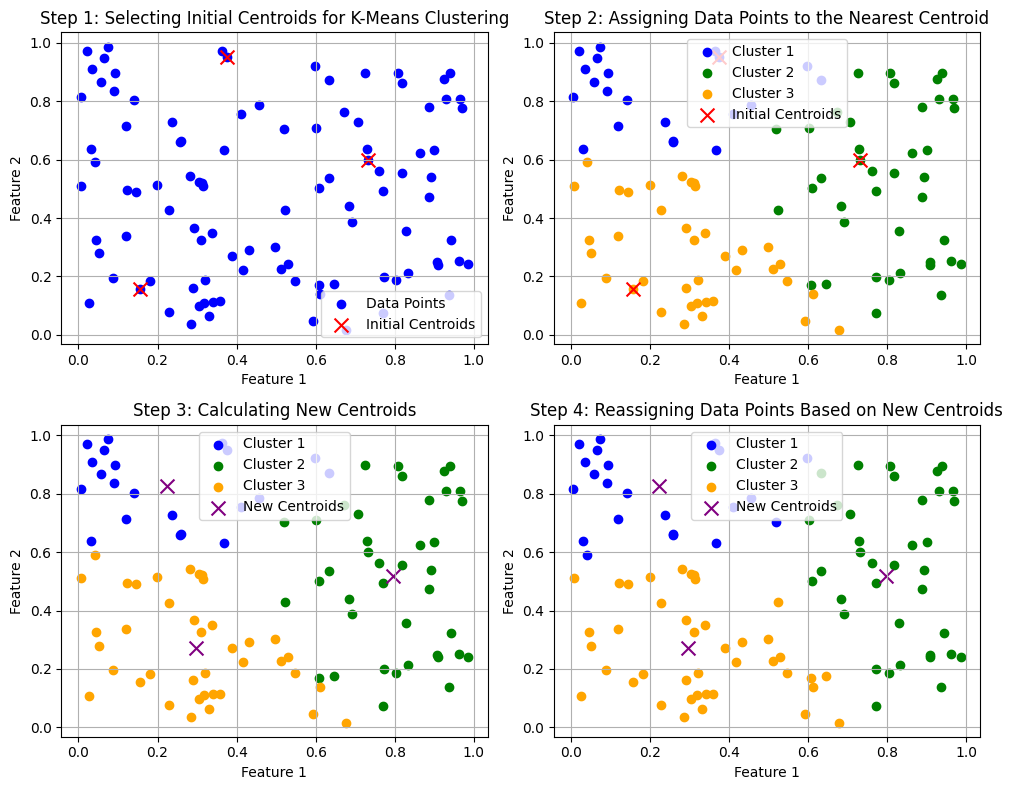

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def k_means_clustering_visualization(K=3, random_seed=42):
    # Generate some random data points
    np.random.seed(random_seed)
    data_points = np.random.rand(100, 2)

    # Select K points as centroids
    initial_centroids = data_points[:K]

    # Step 1: Selecting Initial Centroids
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))

    # Plotting the data points
    ax[0, 0].scatter(data_points[:, 0], data_points[:, 1], c='blue', label='Data Points')
    ax[0, 0].scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red', marker='x', s=100, label='Initial Centroids')
    ax[0, 0].set_title('Step 1: Selecting Initial Centroids for K-Means Clustering')
    ax[0, 0].set_xlabel('Feature 1')
    ax[0, 0].set_ylabel('Feature 2')
    ax[0, 0].legend()
    ax[0, 0].grid(True)

    # Step 2: Assigning Data Points to the Nearest Centroid
    def assign_clusters(data, centroids):
        clusters = {}
        for x in data:
            distances = [np.linalg.norm(x - centroid) for centroid in centroids]
            cluster = distances.index(min(distances))
            if cluster in clusters:
                clusters[cluster].append(x)
            else:
                clusters[cluster] = [x]
        return clusters

    clusters = assign_clusters(data_points, initial_centroids)

    colors = ['blue', 'green', 'orange']
    for cluster, points in clusters.items():
        points = np.array(points)
        ax[0, 1].scatter(points[:, 0], points[:, 1], c=colors[cluster], label=f'Cluster {cluster + 1}')
    ax[0, 1].scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red', marker='x', s=100, label='Initial Centroids')
    ax[0, 1].set_title('Step 2: Assigning Data Points to the Nearest Centroid')
    ax[0, 1].set_xlabel('Feature 1')
    ax[0, 1].set_ylabel('Feature 2')
    ax[0, 1].legend()
    ax[0, 1].grid(True)

    # Step 3: Calculating New Centroids
    def calculate_new_centroids(clusters):
        new_centroids = []
        for cluster, points in clusters.items():
            new_centroid = np.mean(points, axis=0)
            new_centroids.append(new_centroid)
        return np.array(new_centroids)

    new_centroids = calculate_new_centroids(clusters)

    for cluster, points in clusters.items():
        points = np.array(points)
        ax[1, 0].scatter(points[:, 0], points[:, 1], c=colors[cluster], label=f'Cluster {cluster + 1}')
    ax[1, 0].scatter(new_centroids[:, 0], new_centroids[:, 1], c='purple', marker='x', s=100, label='New Centroids')
    ax[1, 0].set_title('Step 3: Calculating New Centroids')
    ax[1, 0].set_xlabel('Feature 1')
    ax[1, 0].set_ylabel('Feature 2')
    ax[1, 0].legend()
    ax[1, 0].grid(True)

    # Step 4: Repeat Steps 2 and 3 Until Convergence
    new_clusters = assign_clusters(data_points, new_centroids)

    for cluster, points in new_clusters.items():
        points = np.array(points)
        ax[1, 1].scatter(points[:, 0], points[:, 1], c=colors[cluster], label=f'Cluster {cluster + 1}')
    ax[1, 1].scatter(new_centroids[:, 0], new_centroids[:, 1], c='purple', marker='x', s=100, label='New Centroids')
    ax[1, 1].set_title('Step 4: Reassigning Data Points Based on New Centroids')
    ax[1, 1].set_xlabel('Feature 1')
    ax[1, 1].set_ylabel('Feature 2')
    ax[1, 1].legend()
    ax[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

k_means_clustering_visualization()

<a id="section_1_3"></a>

#### 1.3. Pros and Cons of K-means 

##### Pros:
- Simple and easy to implement.
- Scales to large data sets.
- Guarantees convergence.
- Each cluster is represented by its centroid, which can provide a clear description of the cluster's center.
<div style="text-align:left">
    <img src="clipart/pros_kmeans.png" alt="Image description" style="width: 700px;"/>
</div>

##### Cons:
- Requires the number of clusters, K, to be specified.
- Sensitive to initial seed selection.
- Assumes clusters are spherical and equally sized.
- Can converge to a local minimum that is not globally optimal.
<div style="text-align:left">
    <img src="clipart/cons_kmeans.png" alt="Image description" style="width: 700px;"/>
</div>

[back to top](#section_0)

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2. Image Segmentation <a id="chapter2"></a>

### Breaking Down the Visual World
Image segmentation is a crucial aspect of computer vision. It involves dividing an image into distinct regions, each corresponding to different objects or parts of the image. 

In this process, each pixel is labeled with identifiers such as "car," "person," or "background." This granular approach allows computers to understand the content of the image at a much deeper level.

The implications of image segmentation are profound, particularly in fields like machine learning and data science, where understanding image content can lead to significant advancements and insights.


<div style="text-align:left">
    <img src="clipart/imagesegmentation.png" alt="Image description" style="width: 400px;"/>
</div>

### Machine Learning and Data Science Applications

### Object Detection and Recognition

Segmentation plays a crucial role in tasks related to detecting and recognizing objects. By separating objects from the background and potentially distinguishing them from each other (a process known as instance segmentation), it enhances the accuracy of identifying the objects in question. For instance, when analyzing an image featuring both a car and a pedestrian, segmentation assists in pinpointing the bounding boxes for each object and categorizing them as "car" and "person" respectively.

### Image Analysis and Comprehension

Segmentation enables the analysis of specific regions within images. In fields like imaging analysis, segmenting organs or tumors from X-ray, MRI, or CT images allows for a more precise assessment of their dimensions, shapes, and any irregularities present. Similarly, in the realm of vehicles, segmentation helps differentiate between lanes, pedestrians, and other obstacles on roadways to facilitate navigation.

### Data Preprocessing

Segmentation serves as a preprocessing step for computer vision tasks. For example, segmenting faces within images can significantly enhance the performance of facial recognition algorithms by guiding the algorithm to focus on areas of interest.

<div style="text-align:left">
    <img src="clipart/imagesegmentation2.png" alt="Image description" style="width: 800px;"/>
</div>

[back to top](#section_0)

### 2.1. Image Segmentation using KMeans Clustering <a id="section_2_1"></a>

To perform image segmentation using KMeans clustering in Python we have folowing stesp:

- Read an image 
- Preprocess the image for clustering
- Find the optimal number of clusters using the Elbow Method
- Apply KMeans clustering to segment the image
- Visualize the original and segmented images

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Optimal number of clusters: 16


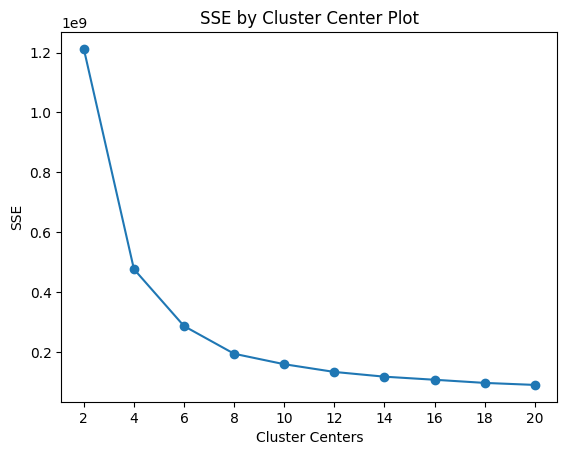

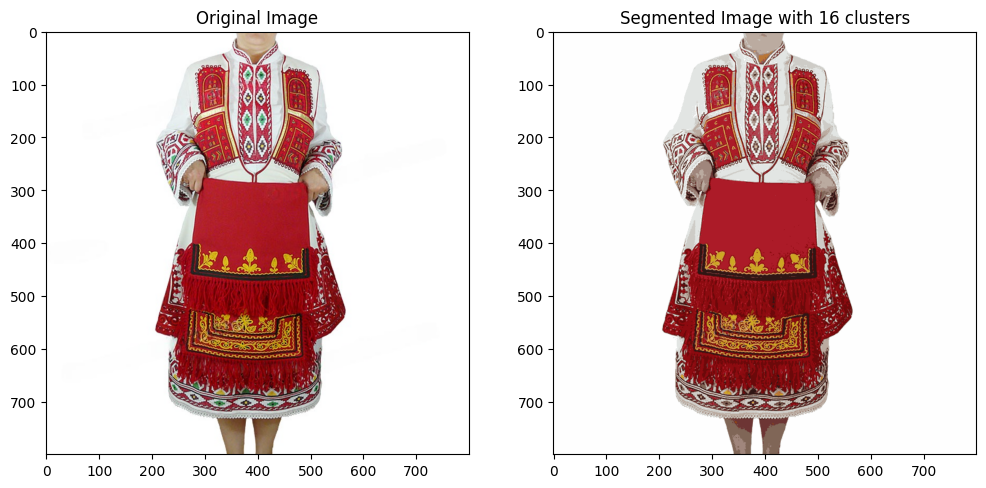

In [3]:
from skimage import io
import cv2
def read_image(file_path):
    """
    Reads an image from the given file path and returns it as a NumPy array.
    """
    img = io.imread(file_path)
    return img

def preprocess_image(image):
    """
    Preprocesses the image for clustering.
    Converts the image to BGR format (required by OpenCV),
    reshapes it into a 2D array of pixel values, and converts them to float32.
    """
    # Convert image to BGR format for OpenCV compatibility
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # Reshape image into a 2D array of pixels (each pixel is a 3-element array)
    pixel_values = image.reshape((-1, 3))
    # Convert pixel values to float32 type for KMeans processing
    pixel_values = np.float32(pixel_values)
    return image, pixel_values

def segment_image(image, n_clusters):
    """
    Segments the image using KMeans clustering.
    Returns the original image (converted back to RGB format) and the segmented image.
    """
    # Preprocess the image to get pixel values for clustering
    image, pixel_values = preprocess_image(image)
    # Apply KMeans clustering to the pixel values
    kmeans = SklearnKMeans(n_clusters=n_clusters, n_init='auto', random_state=0).fit(pixel_values)
    # Replace each pixel value with its corresponding cluster center value
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    # Reshape the segmented pixel values back into the original image shape
    segmented_image = segmented_image.reshape(image.shape).astype(np.uint8)
    # Convert the segmented image back to RGB format for display
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)
    # Convert the original image back to RGB format for display
    original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return original_image_rgb, segmented_image

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    """
    This function finds the optimal number of clusters for KMeans clustering using the Elbow Method.
    It calculates the sum of squared distances (SSE) from each point to its assigned center for a range of cluster values.
    The optimal number of clusters is the one that causes a significant decrease in SSE.

    Parameters:
    data (array): The data to be clustered.
    max_k (int): The maximum number of clusters to test.

    Returns:
    None
    """
    sse = []
    for k in iters:
        sse.append(SklearnKMeans(n_clusters=k, n_init='auto', random_state=0).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
    # Find the optimal number of clusters using the "elbow" method
    optimal_clusters = iters[np.diff(sse, 2).argmin() + 1]  # Second derivative to find elbow
    return optimal_clusters

# Example usage
cat_image_url = "clipart/DeWatermark.ai_1717354139006.png"  # Update with your actual image URL or path
# Read the image from the URL
cat_image = read_image(cat_image_url)

# Find the optimal number of clusters
_, pixel_values = preprocess_image(cat_image)
optimal_clusters = find_optimal_clusters(pixel_values, 20)
print(f'Optimal number of clusters: {optimal_clusters}')

# Segment the image using the optimal number of clusters
original_image, segmented_image = segment_image(cat_image, optimal_clusters)

# Display the original and segmented images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(1, 2, 2)
plt.title(f'Segmented Image with {optimal_clusters} clusters')
plt.imshow(segmented_image)
plt.show()


[back to top](#section_0)

### 2.2. Comparison of K-Means with Agglomerative Clustering <a id="section_2_2"></a>
*Agglomerative clustering begins with N groups, each containing initially one entity, and then the two most similar groups merge at each stage until there is a single group containing all the data.

The original, K-Means segmented, and Agglomerative segmented images are displayed side by side for comparison.

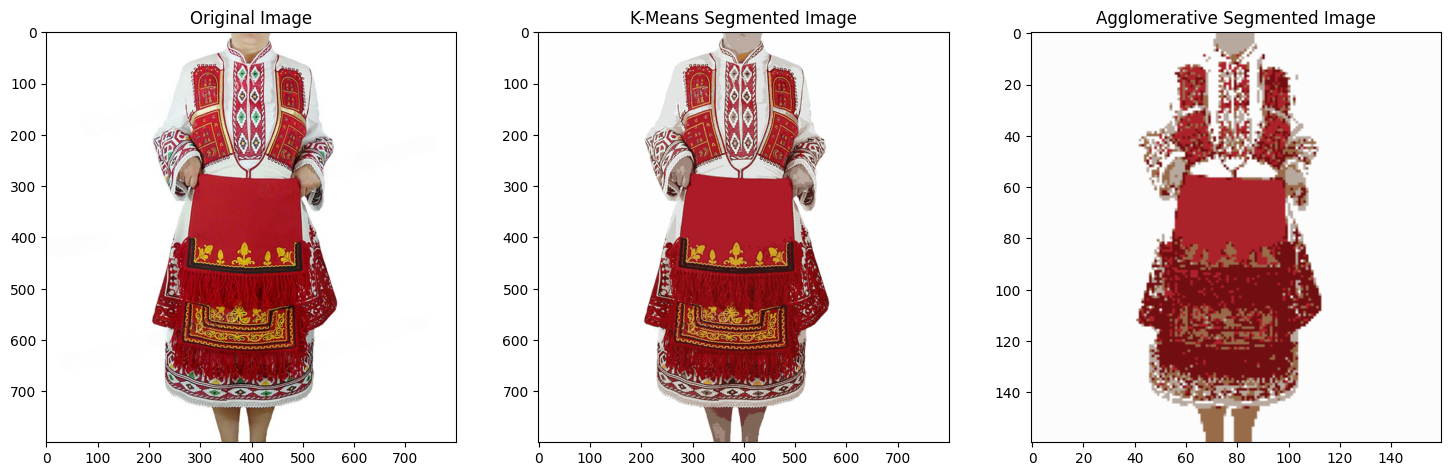

In [4]:
def read_image(file_path):
    """
    Reads an image from the given file path and returns it as a NumPy array.
    """
    img = io.imread(file_path)
    return img

def preprocess_image(image, downscale_factor=0.2):
    """
    Preprocesses the image for clustering.
    Downscales the image, converts the image to BGR format (required by OpenCV),
    reshapes it into a 2D array of pixel values, and converts them to float32.
    """
    # Downscale the image
    image = cv2.resize(image, (0, 0), fx=downscale_factor, fy=downscale_factor)
    # Convert image to BGR format for OpenCV compatibility
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # Reshape image into a 2D array of pixels (each pixel is a 3-element array)
    pixel_values = image.reshape((-1, 3))
    # Convert pixel values to float32 type for clustering processing
    pixel_values = np.float32(pixel_values)
    return image, pixel_values

def segment_image_agglomerative(image, n_clusters):
    """
    Segments the image using Agglomerative Clustering.
    Returns the segmented image.
    """
    # Preprocess the image to get pixel values for clustering
    image, pixel_values = preprocess_image(image)
    # Apply Agglomerative Clustering to the pixel values
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters).fit(pixel_values)
    labels = agglomerative.labels_
    unique_labels = np.unique(labels)
    cluster_centers = np.array([pixel_values[labels == label].mean(axis=0) for label in unique_labels])
    segmented_image = cluster_centers[labels]
    # Reshape the segmented pixel values back into the original image shape
    segmented_image = segmented_image.reshape(image.shape).astype(np.uint8)
    # Convert the segmented image back to RGB format for display
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)
    return segmented_image

# Example usage
image_path = "clipart/DeWatermark.ai_1717354139006.png"  # Update with your actual image path
# Read the image from the path
image = read_image(image_path)

# Segment the image using Agglomerative Clustering
agglomerative_segmented_image = segment_image_agglomerative(image, 5)

# Display the original and segmented images side by side
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image)  # Display the original image correctly
plt.subplot(1, 3, 2)
plt.title('K-Means Segmented Image')
plt.imshow(segmented_image)  # Placeholder for the K-means image, replace with actual if available
plt.subplot(1, 3, 3)
plt.title('Agglomerative Segmented Image')
plt.imshow(agglomerative_segmented_image)
plt.show()


[back to top](#section_0)

<a id="chapter3"></a>

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3. Practical implementation 

### 3.1. Interactive tool for image segmentation <a id="section_3_1"></a>


In [5]:
class KMeans:
    def __init__(self, n_clusters=3, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centers = X[np.random.choice(np.arange(len(X)), self.n_clusters)]
        for _ in range(self.max_iter):
            self.labels = [self._closest_center(x) for x in X]
            new_centers = np.array([X[np.array(self.labels) == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.centers == new_centers):
                break
            self.centers = new_centers

    def _closest_center(self, x):
        return np.argmin([np.linalg.norm(x - center) for center in self.centers])

    def predict(self, X):
        return [self._closest_center(x) for x in X]
# Function to perform image segmentation
def segment_image(image_str, n_clusters):
    image = Image.open(BytesIO(base64.b64decode(image_str)))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    kmeans = SklearnKMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit(pixel_values)
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    segmented_image = segmented_image.reshape(image.shape).astype(np.uint8)
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

    buffer = BytesIO()
    Image.fromarray(segmented_image).save(buffer, format="JPEG")
    return buffer.getvalue()
# Interactive visualization component
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Upload(
        id='upload-image',
        children=html.Div(['Drag and Drop or ', html.A('Select an Image', style={'color': 'white'})], style={'color': 'white'}),
        style={
            'width': '100%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        }
    ),
    dcc.Slider(
        id='cluster-slider',
        min=2,
        max=10,
        step=1,
        value=3,
        marks={i: str(i) for i in range(2, 11)}
    ),
    html.Div(id='output-image', style={'display': 'flex', 'justify-content': 'center', 'align-items': 'center'})
])

def parse_contents(contents):
    content_type, content_string = contents.split(',')
    decoded = base64.b64decode(content_string)
    image = Image.open(BytesIO(decoded))
    return image

@app.callback(Output('output-image', 'children'),
              [Input('upload-image', 'contents'),
              Input('cluster-slider', 'value')])
def update_output(contents, n_clusters):
    if contents is not None:
        image = parse_contents(contents)
        # Convert image to RGB if it has an alpha channel
        if image.mode == 'RGBA':
            image = image.convert('RGB')
        buffered = BytesIO()
        image.save(buffered, format="JPEG")
        image_str = base64.b64encode(buffered.getvalue()).decode()
        segmented_image = segment_image(image_str, n_clusters)
        return html.Div([
            
            html.Div([
                html.H5(f'Segmented Image with {n_clusters} clusters', style={'color': 'white', 'textAlign': 'center'}),
                html.Img(src='data:image/jpeg;base64,' + base64.b64encode(segmented_image).decode(), style={'width': '100%', 'height': 'auto', 'maxWidth': '600px', 'margin': '10px'})
            ], style={'textAlign': 'center'}),
            html.Div([
                html.H5('Original Image', style={'color': 'white', 'textAlign': 'center'}),
                html.Img(src=contents, style={'width': '100%', 'height': 'auto', 'maxWidth': '600px', 'margin': '10px'}),
            ], style={'textAlign': 'center'}),
        ], style={'display': 'flex', 'justifyContent': 'space-around'})

if __name__ == '__main__':
    app.run_server(debug=True)


[back to top](#section_0)

<a id="section_3_2"></a>

### 3.2. Color Palette Analysis 

To identify the dominant colors in folk costumes, we'll follow these steps:

1. Loads images from a specified folder.
2. Preprocessing the Images; Adjust the images, for analysis by resizing them converting to RGB color space, flattening the data and filtering out skin colors.
3. Find the optimal number of clusters using the Elbow Method.**
4. Utilizing K means Clustering to detect the prevailing colors in the images.
5. Converts RGB colors to hex values and retrieves their color names using the 'colory' library.
6. Visualizing Outcome; Present a representation of the colors identified through clustering.

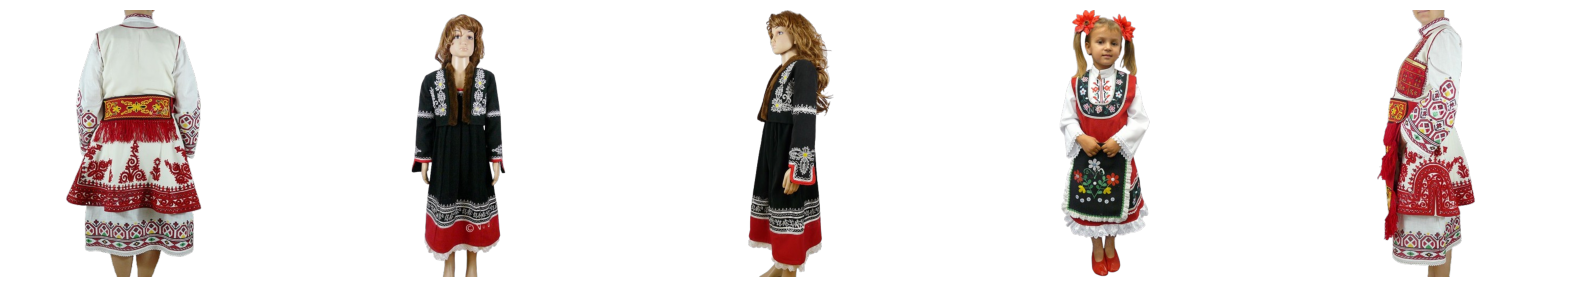

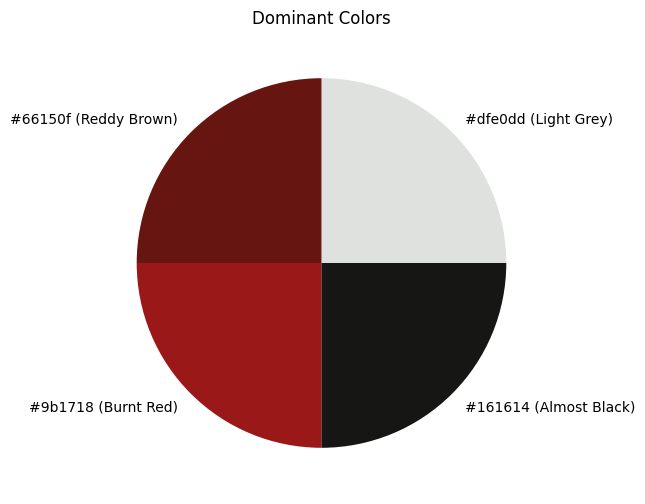

In [6]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_UNCHANGED)
        if img is not None:
            images.append(img)
    return images

def is_skin_color(pixel):
    # Define skin color range in RGB (you may need to adjust these ranges)
    lower = np.array([45, 34, 30], dtype=np.uint8)
    upper = np.array([255, 220, 200], dtype=np.uint8)
    return np.all(pixel >= lower) and np.all(pixel <= upper)

def preprocess_image(image, size=(100, 100)):
    # Convert image to RGBA if it's not already in that format
    if image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    elif image.shape[2] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)

    image = cv2.resize(image, size)
    pixels = image.reshape((image.shape[0] * image.shape[1], 4))

    # Exclude fully transparent pixels and skin color pixels
    filtered_pixels = pixels[(pixels[:, 3] != 0) & ~np.apply_along_axis(is_skin_color, 1, pixels[:, :3])][:, :3]

    return filtered_pixels

def find_optimal_clusters(data, max_k):
    """
    This function finds the optimal number of clusters for KMeans clustering using the Elbow Method.
    It calculates the sum of squared distances (SSE) from each point to its assigned center for a range of cluster values.
    The optimal number of clusters is the one that causes a significant decrease in SSE.

    Parameters:
    data (array): The data to be clustered.
    max_k (int): The maximum number of clusters to test.

    Returns:
    int: The optimal number of clusters.
    """
    iters = range(2, max_k + 1, 2)
    sse = []
    for k in iters:
        sse.append(SklearnKMeans(n_clusters=k, n_init='auto', random_state=0).fit(data).inertia_)
        
    # Find the optimal number of clusters using the "elbow" method
    optimal_clusters = iters[np.diff(sse, 2).argmin() + 1]  # Second derivative to find elbow
    return optimal_clusters

def apply_kmeans(images, n_clusters):
    all_pixels = np.vstack(images)
    kmeans = SklearnKMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    kmeans.fit(all_pixels)
    return kmeans.cluster_centers_, kmeans.labels_

def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

def visualize_dominant_colors(colors, title="Dominant Colors"):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    hex_colors = [rgb_to_hex(color) for color in colors]
    color_names = [Color(hex_code, 'xkcd').name for hex_code in hex_colors]
    plt.pie(np.ones(len(colors)), colors=np.array(colors)/255, labels=[f"{hex_code} ({name})" for hex_code, name in zip(hex_colors, color_names)])
    plt.show()

# Load images
folder = 'costumes'
images = load_images_from_folder(folder)

# Print random 5 images
random_images = random.sample(images, 5)
plt.figure(figsize=(20, 10))
for i, image in enumerate(random_images):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA))
    plt.axis('off')
plt.show()

# Preprocess images
processed_images = [preprocess_image(image) for image in images]

# Find the optimal number of clusters
max_k = 6
optimal_clusters = find_optimal_clusters(np.vstack(processed_images), max_k)

# Apply K-means clustering with the optimal number of clusters
dominant_colors, labels = apply_kmeans(processed_images, n_clusters=optimal_clusters)

# Visualize the dominant colors
visualize_dominant_colors(dominant_colors)

[back to top](#section_0)

   <a id="chapter4"></a>

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3. Conclusion

We highlighted the range of applications for image segmentation in object detection image analysis and data preprocessing. Through implementation the project demonstrated how reliable k means is in real world scenarios like analyzing color palettes in costume images. Future research could delve into combining techniques like learning with clustering algorithms to enhance segmentation accuracy across diverse datasets. 

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 5. References <a id="chapter5"></a>

Abrahamanderson (2021) Image segmentation with K means clustering, Kaggle. Available at: https://www.kaggle.com/code/abrahamanderson/image-segmentation-with-k-means-clustering/notebook. 

Agrawal, S. (2021a) Image segmentation using K-means clustering, Medium. Available at: https://medium.com/swlh/image-segmentation-using-k-means-clustering-46a60488ae71 . 
 
GeeksforGeeks (2024) Hierarchical clustering in machine learning, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/hierarchical-clustering/. 

Imsegkmeans (no date) MATLAB & Simulink Example. Available at: https://www.mathworks.com/help/images/color-based-segmentation-using-k-means-clustering.html . 

K-means clustering (2024) Wikipedia. Available at: https://en.wikipedia.org/wiki/K-means_clustering . 

Kmeans (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html . 

Litjens, G., van der Kooij, J., Eleveld, B., et al. (2014). A survey on deep learning in medical image analysis. Medical image analysis, 42, 60-88. https://www.sciencedirect.com/science/article/abs/pii/S1361841517301135

[back to top](#section_0)